# Healthcare Stroke Prediction

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy.stats as st

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
URL = 'https://drive.google.com/file/d/1mVXZs_EMuWSK2kVqqsGQLbWB1RkRfPk6/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Descriptive Statistic

#### Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Check Duplicated Data

In [ ]:
df.duplicated().any()

False

In [ ]:
df.duplicated(subset=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']).sum()

0

#### Check Null Data

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print('Data Null BMI: ' + str(df['bmi'].isna().sum() / df.shape[0] * 100) + '%')

Data Null BMI: 3.9334637964774952%


Karena Null value dibawah 5% maka dilakukan handling null dengan menghapus null value

In [ ]:
df.dropna(subset=['bmi'], inplace=True)

In [ ]:
df.shape

(4909, 12)

#### Describe data

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Pengamatan\:

A. `Semua tipe data sesuai dan tidak ada duplikasi data`

B. `Hampir Semua kolom tidak memiliki null/missing values kecuali pada kolom BMI`

### Univariate Analysis

In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
numericals = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categoricals = ['gender','ever_married','work_type','Residence_type', 'smoking_status']

In [ ]:
# kolom numerik
df[numericals].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


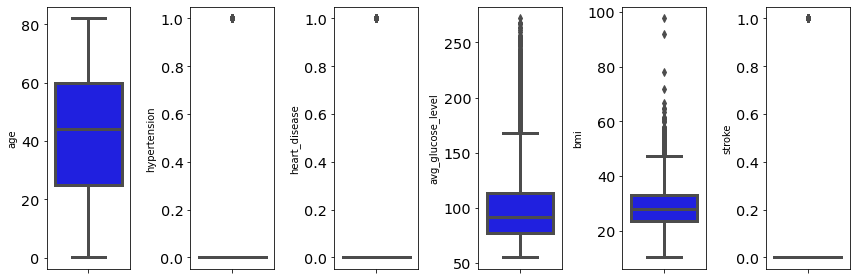

In [ ]:
# Individual Boxplot (Numerical)
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,4)

Boxplot:

* Kolom Age terlihat normal
* Kolom agv_glucose_level dan bmi terlihat outlies
* Selain kolom tersebut bias

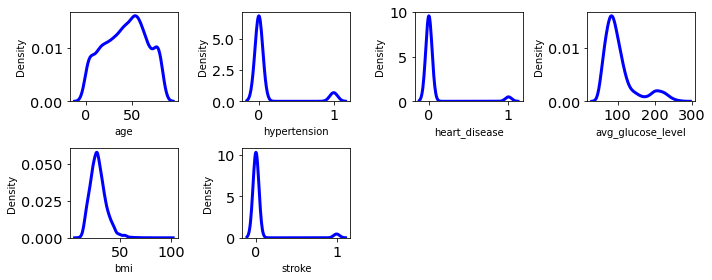

In [ ]:
# Individual Distplot (Numerical)
features = numericals
for i in range (0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (12,5)

Distribution plot:
* Tidak ada satupun kolom yang mendekati distribusi normal
* Hampir semua kolom kecuali age terlihat skewed
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya

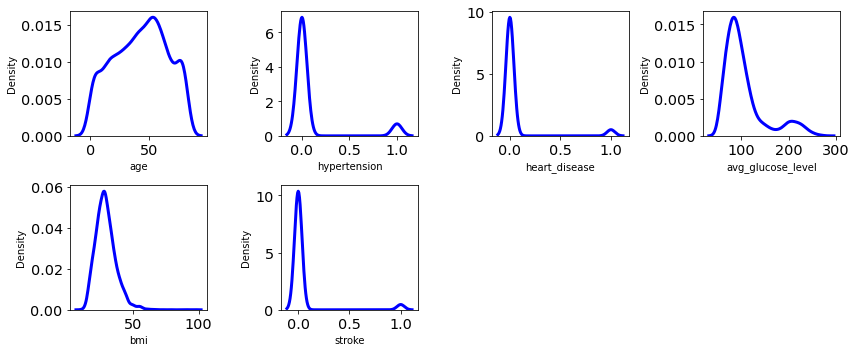

In [ ]:
# Individual Distplot (Numerical)
features = numericals
for i in range (0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (12,5)

In [ ]:
df['stroke'].sum()

209

In [ ]:
# kolom kategori
df[categoricals].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


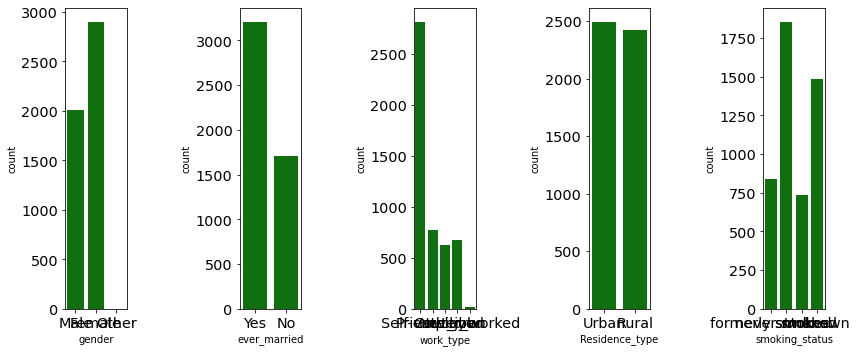

In [ ]:
# Individual Countplot (Categorical)
features = categoricals
for i in range(0, len(features)):
    ax = plt.subplot(1, 
                len(features),
                i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (18,6)

Pengamatan:
1. Data lebih banyak gender wanita dibanding pria dan lainnya
2. Tipe Residen Urban dan Rural memiliki data yang hampir sama

### Multivariate Analysis

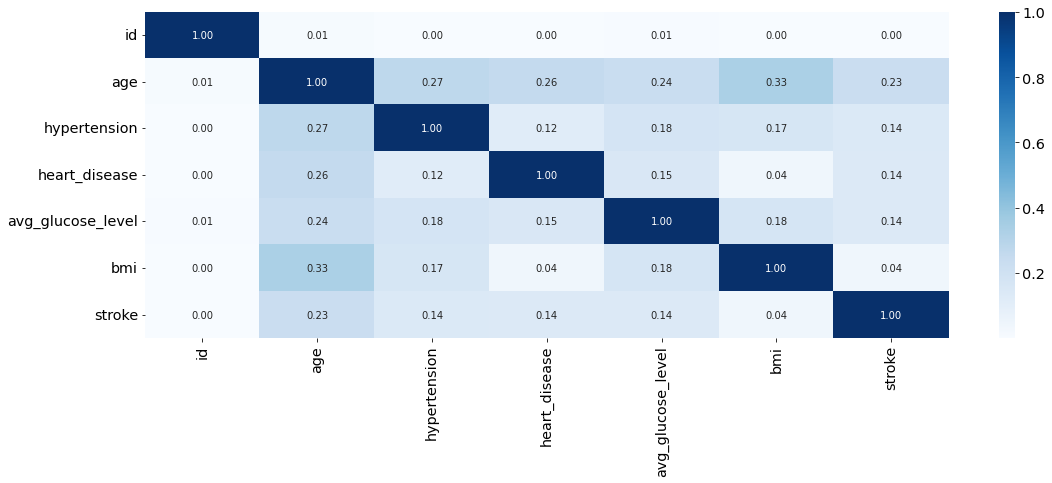

In [ ]:
# Hubungan korelasi
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `Stroke` memiliki korelasi positif kuat dengan `Age`
* Terdapat beberepa korelasi positif lemah

## Data Preparation

### Data Cleansing

#### Handling Outliers

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

col2 = ['age', 'avg_glucose_level', 'bmi']
for col2 in numericals:
    zscore = abs(st.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 4909
Jumlah baris setelah memfilter outlier: 4851


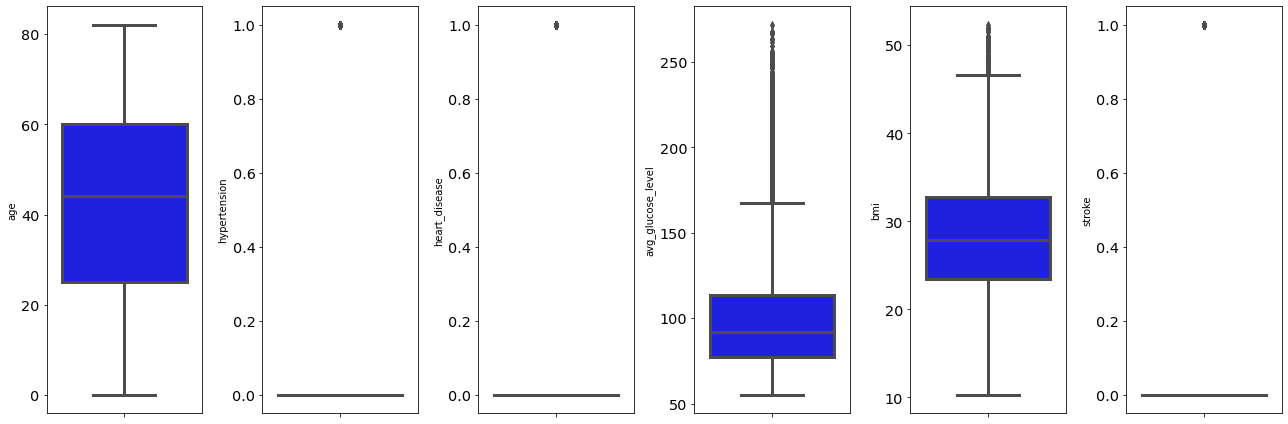

In [ ]:
# Individual Boxplot (Numerical)
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (12,4)

#### Normalization

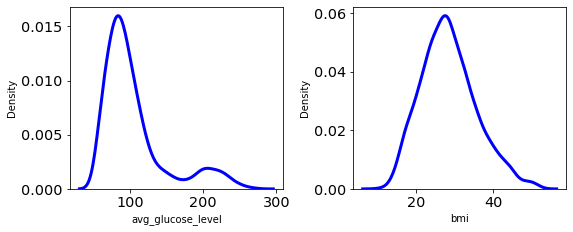

In [ ]:
features = ['avg_glucose_level', 'bmi']
plt.figure(figsize=(12, 6))
for i in range (0, len(features)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Kolom BMI sudah terlihat normal setelah dilakukan handling outlier, sementara avg_glucose_level masih terlihat skewed

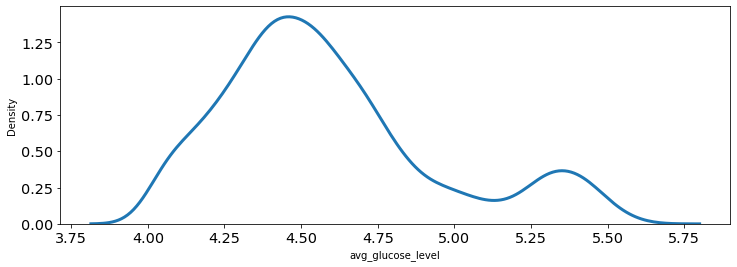

In [ ]:
sns.kdeplot(np.log(df['avg_glucose_level']));

Perubahan skewed setelah dilakukan Log Transformation tidak pengaruh signifikan sehingga tidak jadi digunakan

### Data Transformatioan

#### Feature Encoding
Mentransformasi feature categorical/yang berisi nilai unik menjadi numerical 

In [ ]:
categoricals = ['gender','ever_married','work_type','Residence_type', 'smoking_status']

for col in categoricals:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column gender
Series([], Name: gender, dtype: int64)
------------------------------ 

value counts of column ever_married
Series([], Name: ever_married, dtype: int64)
------------------------------ 

value counts of column work_type
Series([], Name: work_type, dtype: int64)
------------------------------ 

value counts of column Residence_type
Series([], Name: Residence_type, dtype: int64)
------------------------------ 

value counts of column smoking_status
Series([], Name: smoking_status, dtype: int64)
------------------------------ 



Menggunakan Label Encoding pada feature smoking_status karena kolom tersebut bersfiat ranking, selain kolom tersebut menggunakan One Hot Encoding


In [ ]:
#Untuk mengurangi bias maka gender other dimasukan dalam male
mapping_gender = {
    'Male' : 'Male',
    'Female' : 'Female',
    'Other' : 'Male'
}

mapping_smoking_status = {
    'never smoked' : 0,
    'Unknown' : 1,
    'formerly smoked' : 2,
    'smokes' : 3
}

In [ ]:
#Label Encoding
df['gender'] = df['gender'].map(mapping_gender)
df['smoking_status'] = df['smoking_status'].map(mapping_smoking_status)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for cat in ['gender','ever_married','work_type','Residence_type']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,0,1,0,0,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,0,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,0,1,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,0,1,0,0,0,1,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,...,1,0,1,0,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4851 non-null   int64  
 1   gender                   4851 non-null   object 
 2   age                      4851 non-null   float64
 3   hypertension             4851 non-null   int64  
 4   heart_disease            4851 non-null   int64  
 5   ever_married             4851 non-null   object 
 6   work_type                4851 non-null   object 
 7   Residence_type           4851 non-null   object 
 8   avg_glucose_level        4851 non-null   float64
 9   bmi                      4851 non-null   float64
 10  smoking_status           4851 non-null   int64  
 11  stroke                   4851 non-null   int64  
 12  gender_Female            4851 non-null   uint8  
 13  gender_Male              4851 non-null   uint8  
 14  ever_married_No         

In [ ]:
df_2 = df.drop(columns=['id', 'gender', 'ever_married', 'work_type', 'Residence_type' ])

In [ ]:
df_2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,2,1,0,1,0,1,0,0,1,0,0,0,1
2,80.0,0,1,105.92,32.5,0,1,0,1,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,3,1,1,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,0,1,1,0,0,1,0,0,0,1,0,1,0
5,81.0,0,0,186.21,29.0,2,1,0,1,0,1,0,0,1,0,0,0,1


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4851 non-null   float64
 1   hypertension             4851 non-null   int64  
 2   heart_disease            4851 non-null   int64  
 3   avg_glucose_level        4851 non-null   float64
 4   bmi                      4851 non-null   float64
 5   smoking_status           4851 non-null   int64  
 6   stroke                   4851 non-null   int64  
 7   gender_Female            4851 non-null   uint8  
 8   gender_Male              4851 non-null   uint8  
 9   ever_married_No          4851 non-null   uint8  
 10  ever_married_Yes         4851 non-null   uint8  
 11  work_type_Govt_job       4851 non-null   uint8  
 12  work_type_Never_worked   4851 non-null   uint8  
 13  work_type_Private        4851 non-null   uint8  
 14  work_type_Self-employed 

In [ ]:
df_2.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')

## Machine Learning Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings(action='ignore')

### Train Test

#### Split Feature and Target

In [ ]:
x = df_2[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban']]
y = df_2['stroke']

#### Split Train Test Data

In [ ]:
#Splitting the data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#### Model Training

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

                   Logistic Regression: 94.81%
                   K-Nearest Neighbors: 94.23%
                         Decision Tree: 90.52%
Support Vector Machine (Linear Kernel): 92.09%
   Support Vector Machine (RBF Kernel): 94.81%
                        Neural Network: 94.81%
                         Random Forest: 94.64%
                     Gradient Boosting: 94.56%
                               XGBoost: 94.81%
                              LightGBM: 94.15%
